In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
from collections import Counter
from os import system,remove 
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
filename='selection_mc/selection_mc_0.h5'
with h5py.File(filename, "r") as f:
    print(list(f['c2'][:]))
    print((f['c2'][-1]))
    print(len(list(f['c2'][:])))

[0.015, 0.0078, 0.004, 0.0056, 0.0002, 0.0004, 0.0004, 0.0012, -0.0008, 0.0022, -0.0056, -0.0058, -0.0098, 0.001, -0.0138, -0.0008, -0.0058, -0.003, 0.0084, 0.0004, -0.0096, -0.0078, -0.0102, -0.007, -0.0202, -0.0148, -0.0006, -0.009, -0.0044, -0.0072, -0.0112, -0.0052, 0.0102, 0.0054, -0.0074, -0.0102, -0.0156, -0.0196, -0.0224, -0.0252, -0.0262, -0.0212, -0.0168, -0.0098, -0.0154, -0.0414, -0.0266, -0.004, -0.014, -0.0096, -0.0302, -0.009, -0.006, -0.006, -0.0084, -0.0142, 0.0014, 0.0224, 0.0316, 0.0084, 0.0108, -0.003, -0.0044, 0.0028, -0.0054, -0.0086, -0.0106, 0.0038, -0.0072, -0.0148, -0.0108, -0.0154, 0.0014, -0.0108, -0.0196, -0.0112, -0.0062, -0.0176, -0.0032, -0.0138, -0.027, -0.023, -0.0356, -0.0196, -0.0244, -0.0014, 0.0174, 0.0062, 0.0142, -0.004, -0.0106, -0.0082, -0.016, -0.0208, -0.0152, -0.004, -0.0122, -0.023, -0.0134, -0.0248, -0.0064, -0.011, -0.0278, -0.0186, -0.0032, -0.0262, -0.007, -0.0076, -0.02, -0.028, -0.0254, -0.0246, 0.0022, 0.005, 0.0188, 0.012, -0.0052, 

In [3]:
print(64*63*62/2/3)

41664.0


In [4]:
lin_size=32
Id=np.zeros((lin_size,lin_size))
Distance=np.zeros((lin_size*lin_size,lin_size*lin_size))
Id1=[[j for j in range(i*lin_size,i*lin_size+lin_size)] for i in range(lin_size)]
Id2=[[j for j in range(i*lin_size,i*lin_size+lin_size)] for i in range(lin_size)]
# for i in range()


Id1=np.array(Id1)
Id2=np.array(Id2)
print(Id.shape)
print(Distance.shape)

(32, 32)
(1024, 1024)


In [5]:
for i in range(lin_size):
    for j in range(lin_size):
        # Id1
        for k in range(lin_size):
            for l in range(lin_size):
                # Id2
                X_dis=abs(i-k)
                Y_dis=abs(l-j)
                # periodic boundary
                if(X_dis>=lin_size/2):
                    X_dis=lin_size-X_dis
                if(Y_dis>=lin_size/2):
                    Y_dis=lin_size-Y_dis
                Distance[i*lin_size+j,k*lin_size+l]=(X_dis**2+Y_dis**2)**0.5
print(Distance)



[[0.         1.         2.         ... 3.16227766 2.23606798 1.41421356]
 [1.         0.         1.         ... 4.12310563 3.16227766 2.23606798]
 [2.         1.         0.         ... 5.09901951 4.12310563 3.16227766]
 ...
 [3.16227766 4.12310563 5.09901951 ... 0.         1.         2.        ]
 [2.23606798 3.16227766 4.12310563 ... 1.         0.         1.        ]
 [1.41421356 2.23606798 3.16227766 ... 2.         1.         0.        ]]


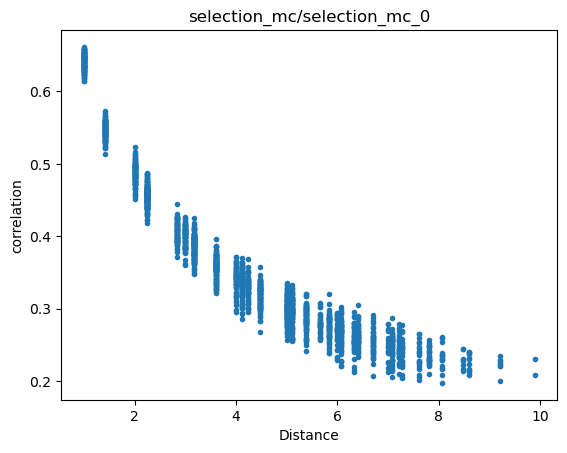

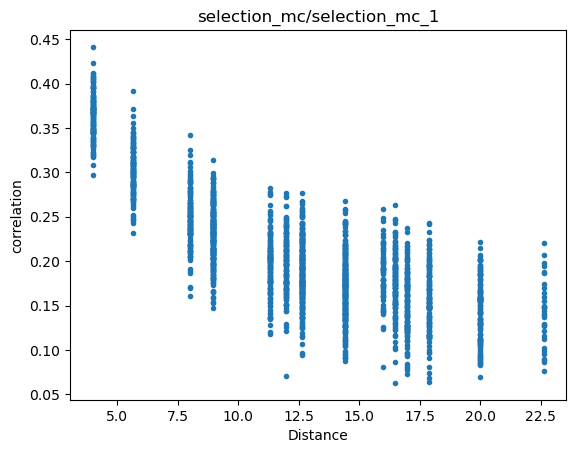

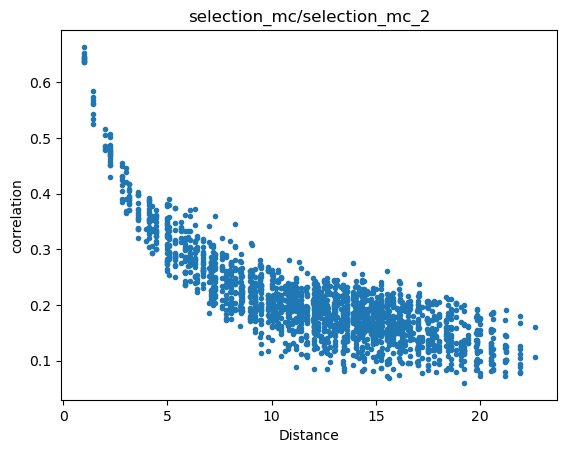

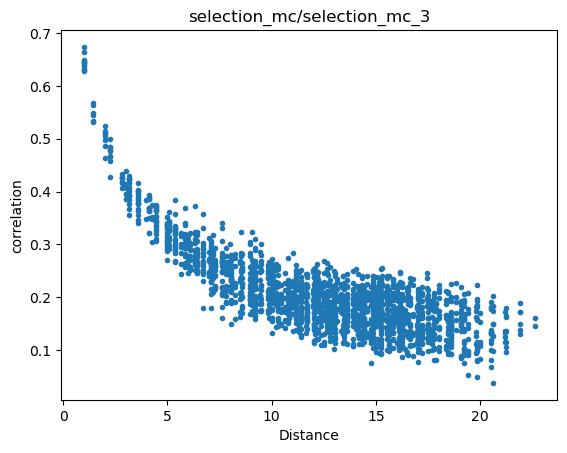

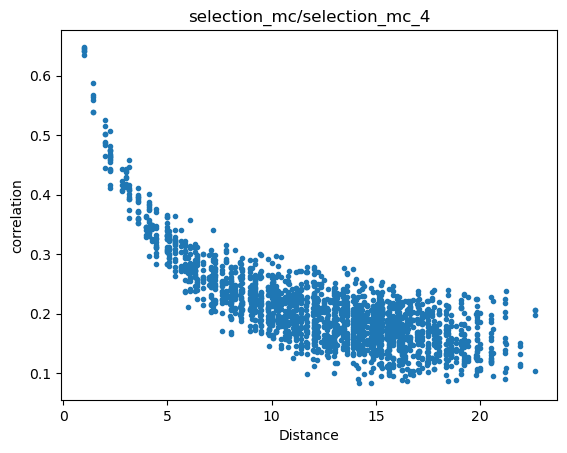

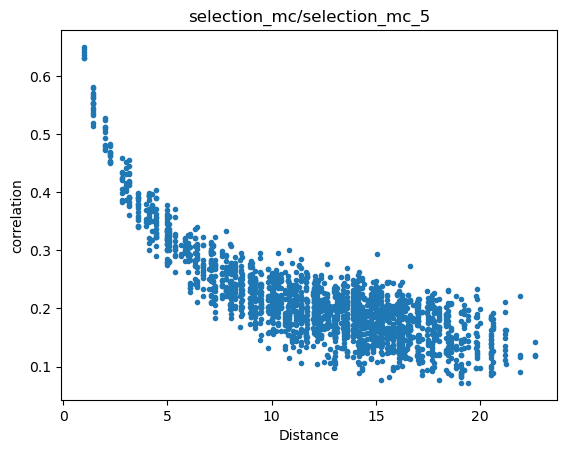

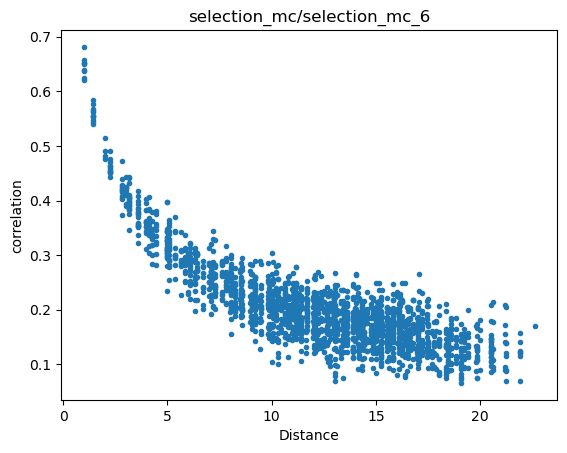

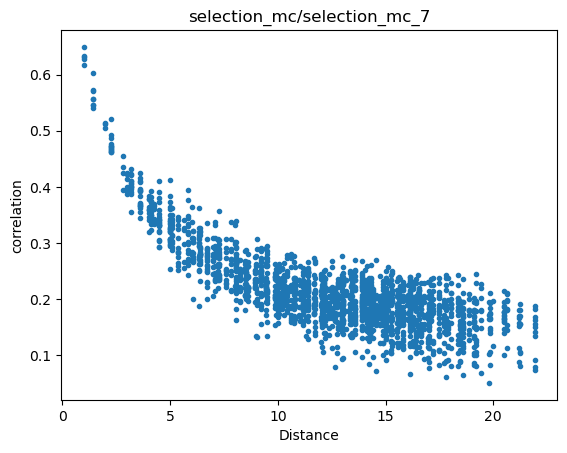

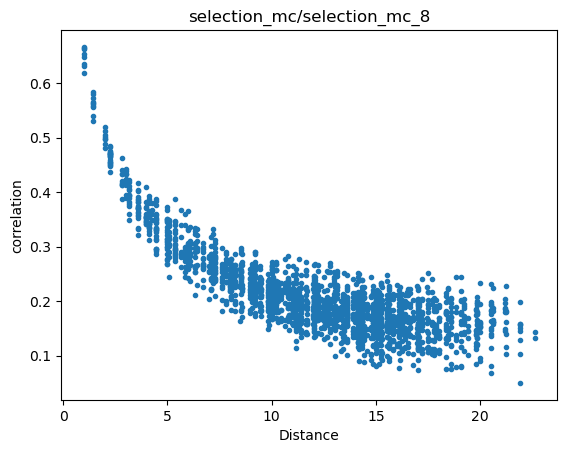

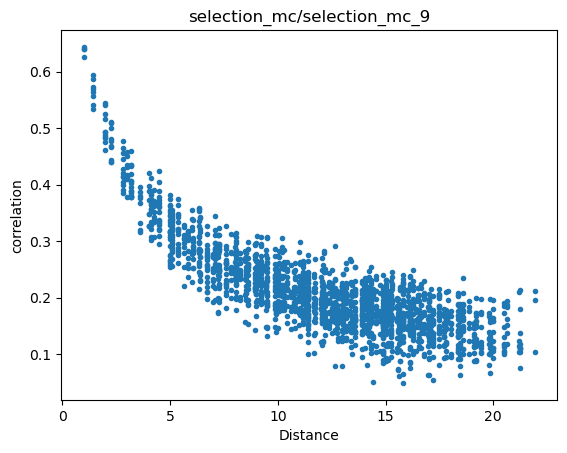

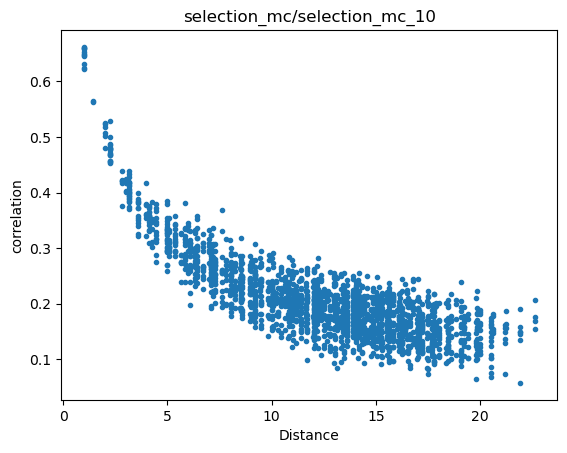

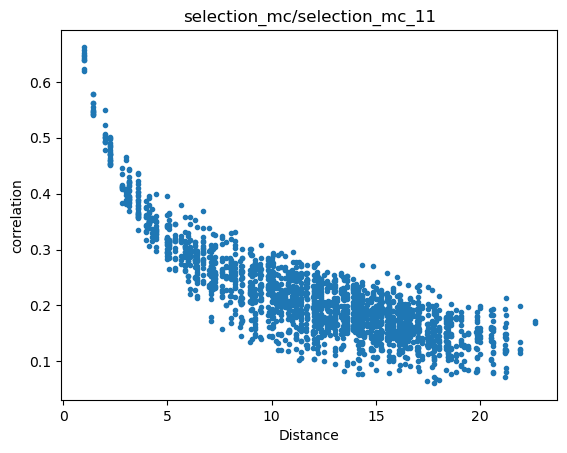

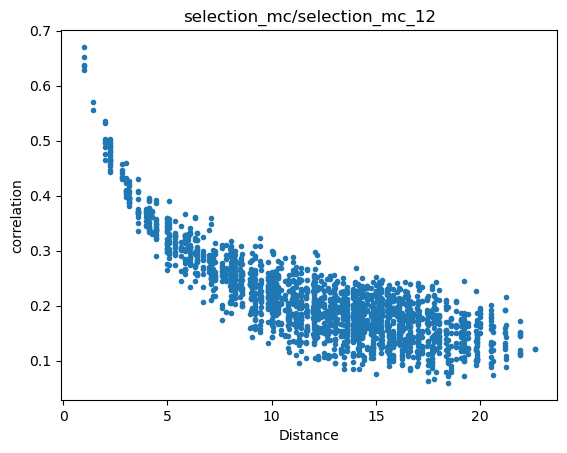

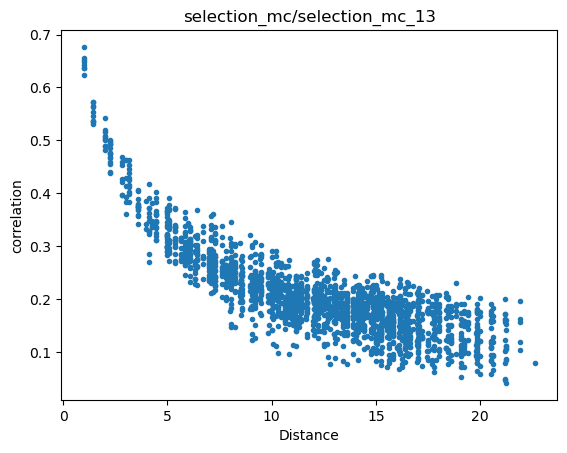

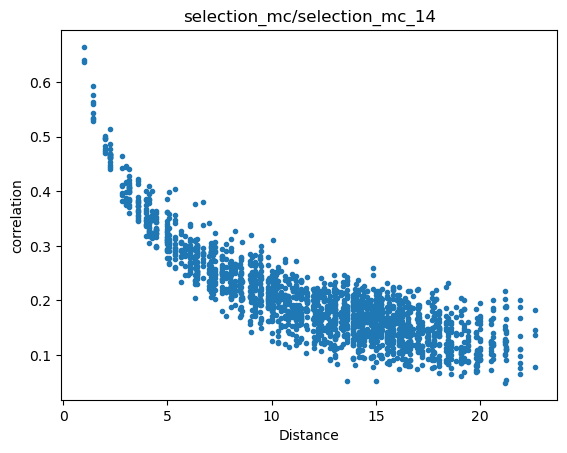

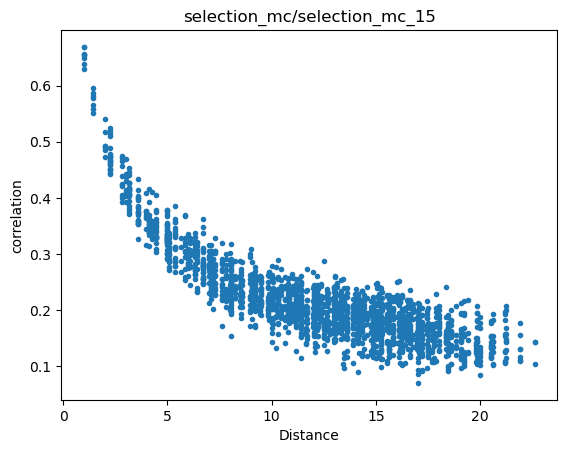

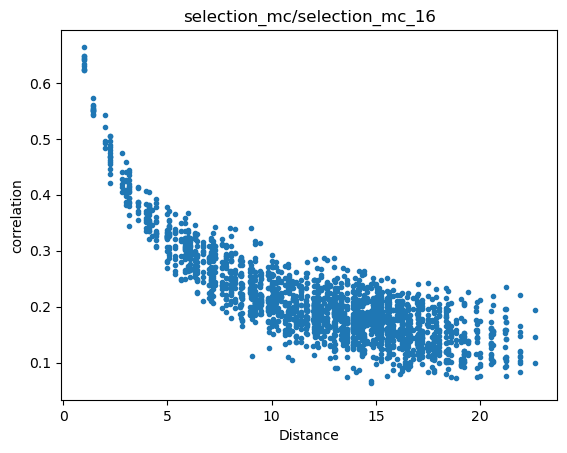

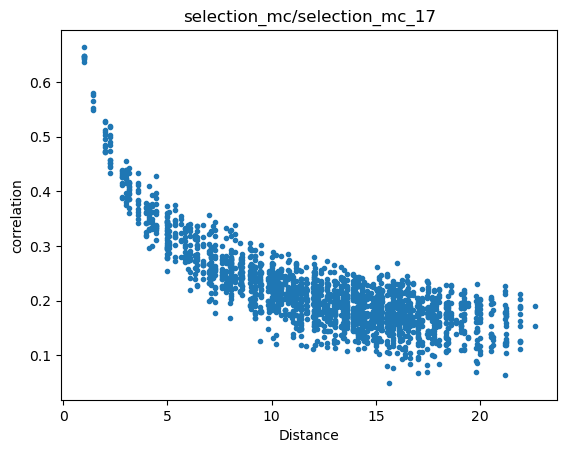

<Figure size 640x480 with 0 Axes>

In [6]:

for i in range(18):
    Dis_list=[]
    filename=f'selection_mc/selection_mc_{i}.h5'
    with h5py.File(filename, "r") as f:
        chosen_indices=list(f['chosen_indices'][:])
        Correlaiton_list=list(f['c'][:])
        for index1 in range(len(chosen_indices)):
            for index2 in range(index1):
                Dis_list.append(Distance[chosen_indices[index1],chosen_indices[index2]])

    plt.plot(Dis_list,Correlaiton_list,'.')
    plt.title(filename[:-3])
    plt.xlabel('Distance')
    plt.ylabel('correlation')
    plt.figure()
        


In [7]:
lin_size=32
Distance=np.zeros((lin_size*lin_size,lin_size*lin_size))
for i in range(lin_size):
    for j in range(lin_size):
        # Id1
        for k in range(lin_size):
            for l in range(lin_size):
                # Id2
                X_dis=abs(i-k)
                Y_dis=abs(l-j)
                # periodic boundary
                if(X_dis>=lin_size/2):
                    X_dis=lin_size-X_dis
                if(Y_dis>=lin_size/2):
                    Y_dis=lin_size-Y_dis
                Distance[i*lin_size+j,k*lin_size+l]=(X_dis**2+Y_dis**2)**0.5

<Figure size 640x480 with 0 Axes>

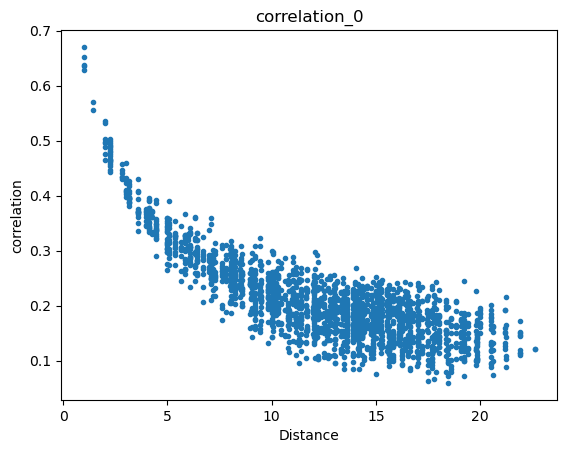

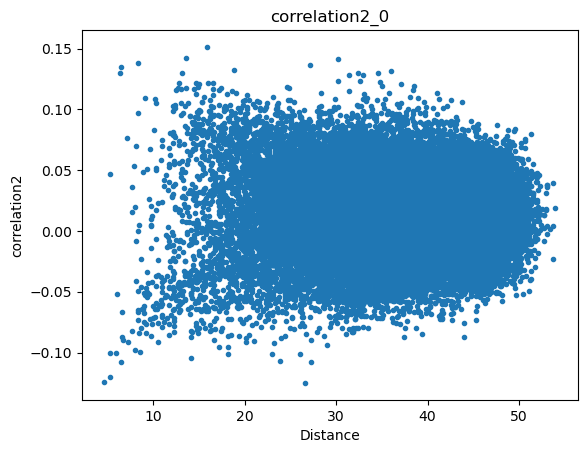

<Figure size 640x480 with 0 Axes>

In [8]:
filename=f'selection_mc/selection_mc_12.h5'
Dis_list=[]
Dis2_list=[]
with h5py.File(filename, "r") as f:
    chosen_indices=list(f['chosen_indices'][:])
    Correlaiton_list=list(f['c'][:])
    Correlaiton2_list=list(f['c2'][:])
    for index1 in range(len(chosen_indices)):
        for index2 in range(index1):
            Dis_list.append(Distance[chosen_indices[index1],chosen_indices[index2]])
            for index3 in range(index2):
                Dis2=Distance[chosen_indices[index1],chosen_indices[index2]]+Distance[chosen_indices[index1],chosen_indices[index3]]+Distance[chosen_indices[index2],chosen_indices[index3]]
                Dis2_list.append(Dis2)


plt.plot(Dis_list,Correlaiton_list,'.')
plt.title('correlation_0')
plt.xlabel('Distance')
plt.ylabel('correlation')
plt.figure()
plt.plot(Dis2_list,Correlaiton2_list,'.')
plt.title('correlation2_0')
plt.xlabel('Distance')
plt.ylabel('correlation2')
plt.figure()

In [9]:
# config_list=[]
filename='selection_mc/config_12.h5'
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    tmp=list(f['config'][:])
    # print(list(f['config']))
    # print(len(list(f['c2'][:])))
with h5py.File('selection_mc/selection_mc_12.h5', "r") as f:
    print("Keys: %s" % f.keys())
    chosen_indice_list=list(f['chosen_indices'][:])
    # print(list(f['config']))
    # print(len(list(f['c2'][:])))

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'selection_mc/config_12.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [10]:
print(len(chosen_indice_list))
print(chosen_indice_list)

NameError: name 'chosen_indice_list' is not defined

In [11]:
def split_list(l, n):
  # 將list分割 (l:list, n:每個matrix裡面有n個元素)
  for idx in range(0, len(l), n):
    yield l[idx:idx+n]



In [61]:
betas=[]
a=0.1
while(a<2.0):
    betas.append(a)
    a+=0.05
config_list=[]
Mlist=[]
Elist=[]
E2list=[]
MElist=[]
New_Mlist=[]
cv=[]
dMdT=[]
h=0.1
filenumber=0
for beta in betas:
    filename=f'selection_mc/config_l32Beta{beta:.03g}h{h:.04g}_{filenumber}.h5'

    # print(filename)
    with h5py.File(filename, "r") as f:
        # print("Keys: %s" % f.keys())
        E=list(f['E'][:])
        E2=list(f['E2'][:])
        ME=list(f['ME'][:])
        M=list(f['Mtotal'][:])



        Mlist.append(M[0])
        Elist.append(E[0])
        E2list.append(E2[0])
        MElist.append(ME[0])
        cv.append(beta*beta*(E2[0]-E[0]*E[0]))
        dMdT.append(beta*beta*(ME[0]-E[0]*M[0]))
        
# for i in range(len(Mlist)):
#     # for j in range(Mlist[i]):
#     New_Mlist.append(sum(Mlist[i])/len(Mlist[i]))  
        # print(list(f['config']))
        # print(len(list(f['c2'][:])))
New_Mlist=[m/1024 for m in Mlist ]
T=[1/t for t in betas ]
New_Elist=[E/1024 for E in Elist ]
New_E2list=[E2/1024 for E2 in E2list ]

In [16]:
print(T[cv.index(max(cv))])
print(f'{betas[cv.index(max(cv))]:.03g}')
# print(Elist)

2.5
0.4


<Figure size 640x480 with 0 Axes>

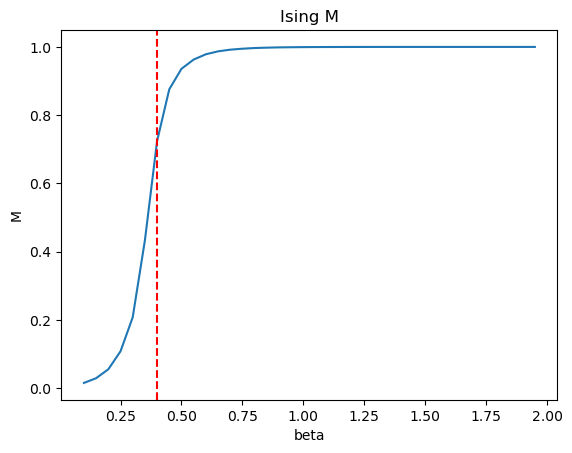

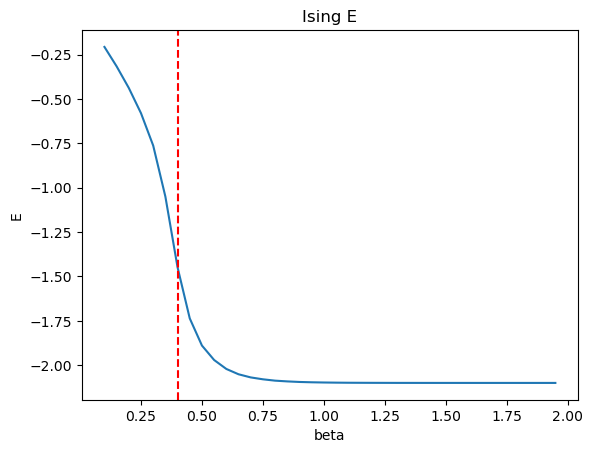

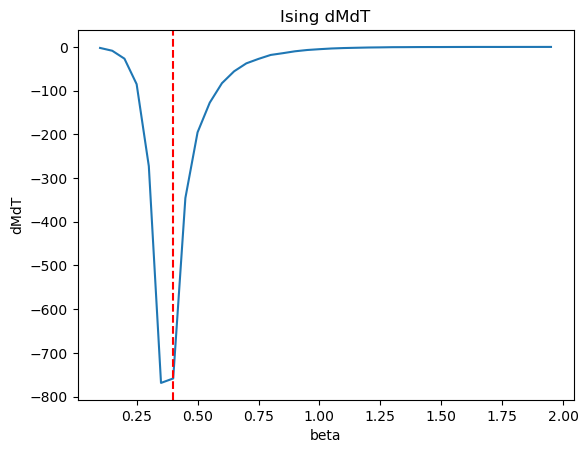

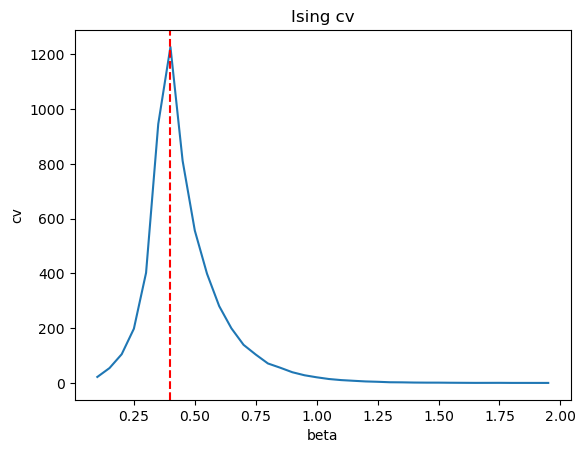

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot magnetization


plt.plot(betas,New_Mlist)
plt.xlabel('beta')
plt.ylabel('M')
plt.title('Ising M')
plt.axvline(betas[cv.index(max(cv))],color = 'r',ls='--')
plt.figure()
# Plot energy

plt.plot(betas,New_Elist)
plt.xlabel('beta')
plt.ylabel('E')
plt.title('Ising E')
plt.axvline(betas[cv.index(max(cv))],color = 'r',ls='--')
plt.figure()
# Plot dMdT
plt.plot(betas,dMdT)
plt.xlabel('beta')
plt.ylabel('dMdT')
plt.title('Ising dMdT')
plt.axvline(betas[cv.index(max(cv))],color = 'r',ls='--')
plt.figure()

plt.plot(betas,cv)
plt.xlabel('beta')
plt.ylabel('cv')
plt.title('Ising cv')
plt.axvline(betas[cv.index(max(cv))],color = 'r',ls='--')
plt.figure()

# plt.plot(betas,New_E2list)
# plt.xlabel('beta')
# plt.ylabel('E2')
# plt.title('Ising E2')
# plt.figure()

Keys: <KeysViewHDF5 ['c', 'chosen_indices', 'm']>
[11, 245, 386, 836, 432, 626, 784, 411, 893, 948, 150, 718, 412, 837, 21, 361, 493, 895, 55, 273, 299, 692, 307, 187, 450, 543, 967, 525, 689, 124, 340, 281, 584, 675, 288, 116, 681, 65, 490, 664, 141, 703, 33, 927, 231, 583, 267, 185, 383, 486, 256, 863, 866, 740, 452, 561, 641, 511, 755, 467, 631, 13, 26, 277]
64


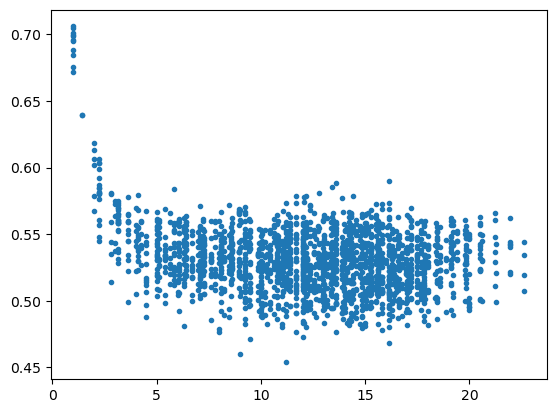

In [55]:

field=0.1
mcfile=f'selection_mc/l32Beta0.4h0.1_10.h5'
Niter=1024
resultfile=f'blresult/blresult_l32Beta{betas[cv.index(max(cv))]:.03g}h{field:.04g}_10.npz'
Dis_list=[]
with h5py.File(mcfile, "r") as f:
    print("Keys: %s" % f.keys())
    aC=f['c'][()]
    chosen_indice_10=list(f['chosen_indices'][()])
    Correlaiton_list_10=f['c'][()]
    for index1 in range(len(chosen_indice_10)):
        for index2 in range(index1):
            Dis_list.append(Distance[chosen_indice_10[index1],chosen_indice_10[index2]])

print(chosen_indice_10)
print(len(chosen_indice_10))

plt.plot(Dis_list,Correlaiton_list_10,'.')

# system(f'nice -n +20 python blwar1.py -m {mcfile} -r {resultfile} -t {Niter} ')

In [71]:
filename=f'selection_mc/config_l32Beta0.4h0.1_0.h5'
# config_list=[]
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    print(len(f['config'][:]))
    config_list=list(f['config'][:])

Keys: <KeysViewHDF5 ['E', 'E2', 'ME', 'Mtotal', 'config']>
10240000


In [76]:
print(len(config_list))
ising_config=list(split_list(config_list,1024))
print(len(ising_config))


10240000
10000


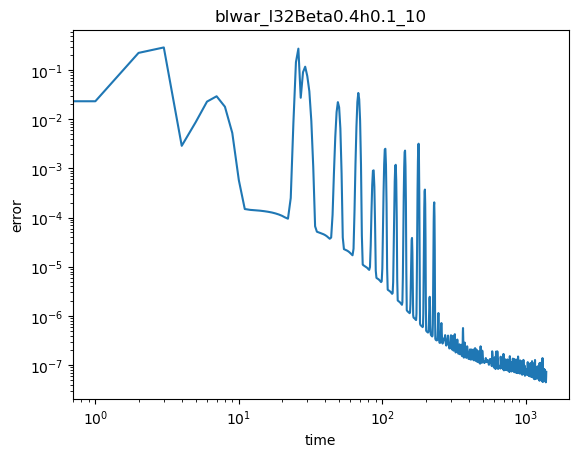

In [94]:
data = np.load(resultfile,allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]

filename=f'input/input_file_l32Beta{betas[cv.index(max(cv))]:.03g}h{field:.04g}_10.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
error=data['error'][()]
plt.plot(error['mses'])
plt.title(f'blwar_l32Beta{betas[cv.index(max(cv))]:.03g}h{field:.04g}_10')
plt.xlabel('time')
plt.ylabel('error')

plt.yscale('log')
plt.xscale('log')

In [ ]:
# beta=0.4
# data = np.load(f'blresult/blresult_l32Beta0.4h0.1.npz',allow_pickle=True)
# # lst = data.files
# # print(lst)
# # for item in lst:
# #     # print(item)
# #     print(data[item])
# state=data['state'][()]
# h=state['hjbest'][:64]
# j=state['hjbest'][64:]

# filename=f'input/input_file_l32Beta0.4h0.1_4.h5'
# with h5py.File(filename, "w") as f:
# # f.create_dataset('h',data=h)
# # f.create_dataset('j',data=j)
#     f['h']=h
#     f['j']=j
# error=data['error'][()]
# plt.plot(error['mses'])
# plt.xlabel('time')
# plt.ylabel('error')

# plt.yscale('log')
# plt.xscale('log')

45.31885325616839
5.255758357459037


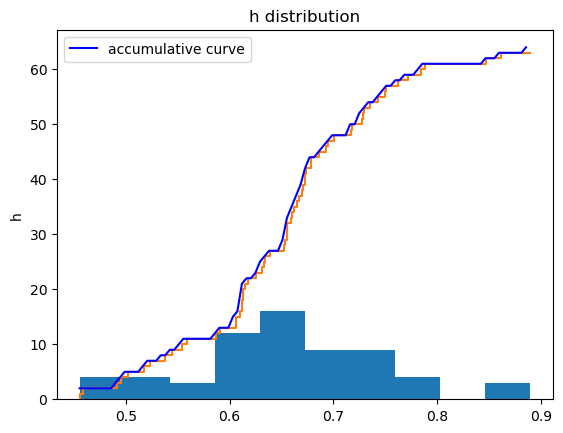

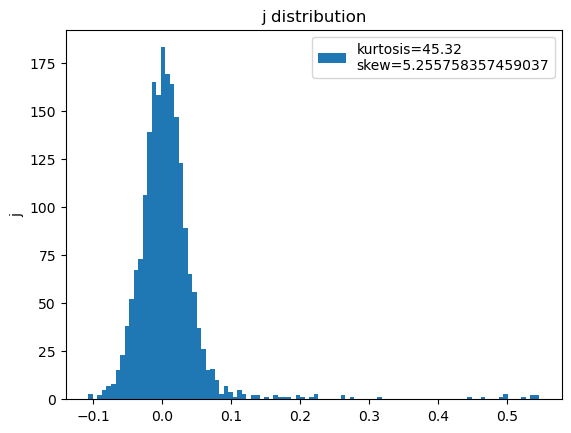

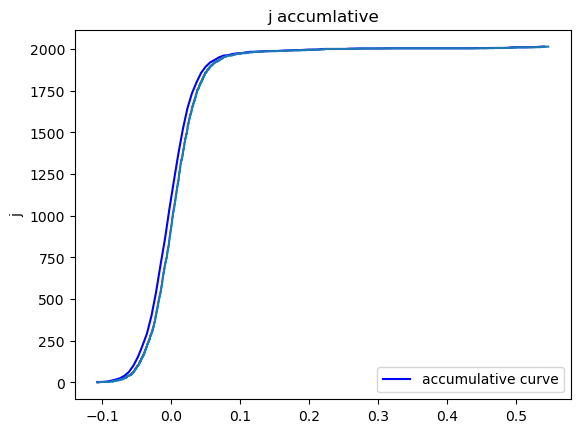

In [20]:


plt.hist(h)
plt.ylabel('h')
plt.title('h distribution')
sorted_data = np.sort(h)
plt.step(sorted_data, np.arange(sorted_data.size))
values, base = np.histogram(h, bins=100)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue',label='accumulative curve')
plt.legend()
plt.figure()

plt.hist(j,bins=100,label=f'kurtosis={kurtosis(j):.04g}\nskew={skew(j)}')
plt.ylabel('j')
plt.title('j distribution')
plt.legend()
plt.figure()
values, base = np.histogram(j, bins=100)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue',label='accumulative curve')
plt.ylabel('j')
plt.title('j accumlative')
sorted_data = np.sort(j)
plt.step(sorted_data, np.arange(sorted_data.size))
plt.legend()
print(kurtosis(j))
print(skew(j))
#plot the survival function
# plt.plot(base[:-1], len(data)-cumulative, c='green')

In [86]:
# call sspin

field=0.1
sspin_aC=[]
sspin_cv=[]
sspin_dMdT=[]
sspin_M=[]
filename=f'input/input_file_l32Beta{betas[cv.index(max(cv))]:.03g}h{field:.04g}_10.h5'
# print(filename)
niter=10000
for beta in betas:

    prmf=filename
    datf = f'output/output_12_l32Beta{beta:.03g}h{field:.04g}_10.h5'
    system(f'nice -n +20 ./sspin1 {prmf} {datf} {niter} --beta={beta:.03g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        aC=f['result1']['aC'][()]

        cnt=f['result1']['cnt'][()]
        # print(E)
        sspin_cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        sspin_dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        sspin_M.append(M/cnt)
        sspin_aC.append(aC)

In [88]:
# print(len(sspin_aC[0]))

2016


In [40]:
print(f'output/output_config_Beta{betas[sspin_cv.index(max(sspin_cv))]:0.3g}_10.h5',)

with h5py.File(f'output/output_config_Beta{betas[sspin_cv.index(max(sspin_cv))]:.03g}_10.h5', "r") as f:
    print("Keys: %s" % f.keys())
    sspin_config_all=f['config'][()]
    print(f['config'][()].size)
sspin_config=list(split_list(sspin_config_all,64))
print(len(sspin_config[0]))

output/output_config_Beta1.15_10.h5
Keys: <KeysViewHDF5 ['config']>
640000
64


In [95]:
draw3_list=[]
draw4_list=[]
# print(chosen_indice_10)
for i in range(2000):
    draw3=random.sample(chosen_indice_10,3)
    draw4=random.sample(chosen_indice_10,4)
    draw3_list.append(draw3)
    draw4_list.append(draw4)

m=0
# print(draw3_list)
# print(draw3_list[0][0])
ising_c4_array=np.zeros(2000)
sspin_c4_array=np.zeros(2000)

ising_c3_array=np.zeros(2000)
sspin_c3_array=np.zeros(2000)
for i in range(len(sspin_config)):
    for j in range(len(draw3_list)):
        sspin_c3=0
        ising_c3=0
        sspin_c4=0
        ising_c4=0
        for index1_c4 in range(len(draw4_list[j])):
            for index2_c4 in range(index1_c4):
                sspin_c4+=sspin_config[i][chosen_indice_10.index(draw4_list[j][index1_c4])]*sspin_config[i][chosen_indice_10.index(draw4_list[j][index2_c4])]
                ising_c4+=ising_config[i][draw4_list[j][index1_c4]]*ising_config[i][draw4_list[j][index2_c4]]
        for k in range(len(draw3_list[j])):
            for l in range(k):
                sspin_c3+=sspin_config[i][chosen_indice_10.index(draw3_list[j][k])]*sspin_config[i][chosen_indice_10.index(draw3_list[j][l])]
                ising_c3+=ising_config[i][draw3_list[j][k]]*ising_config[i][draw3_list[j][l]]
        sspin_c4_array[j]+=sspin_c4
        ising_c4_array[j]+=ising_c4

        sspin_c3_array[j]+=sspin_c3
        ising_c3_array[j]+=ising_c3

for i in range(sspin_c3_array.size):
    sspin_c3_array[i]=sspin_c3_array[i]/len(sspin_config)
    ising_c3_array[i]=ising_c3_array[i]/len(ising_config)

    sspin_c4_array[i]=sspin_c4_array[i]/len(sspin_config)
    ising_c4_array[i]=ising_c4_array[i]/len(ising_config)

In [84]:
for i in range(sspin_c3_array.size):
    sspin_c3_array[i]=sspin_c3_array[i]/len(sspin_config)
    ising_c3_array[i]=ising_c3_array[i]/len(ising_config)

21


<Figure size 640x480 with 0 Axes>

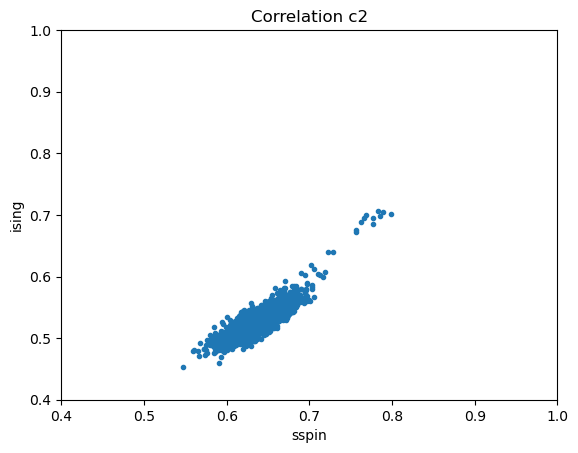

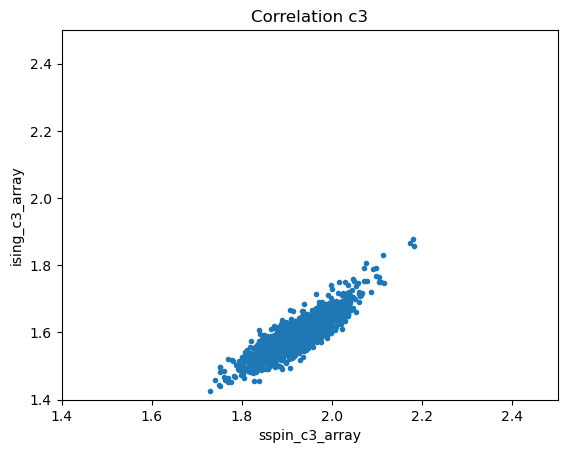

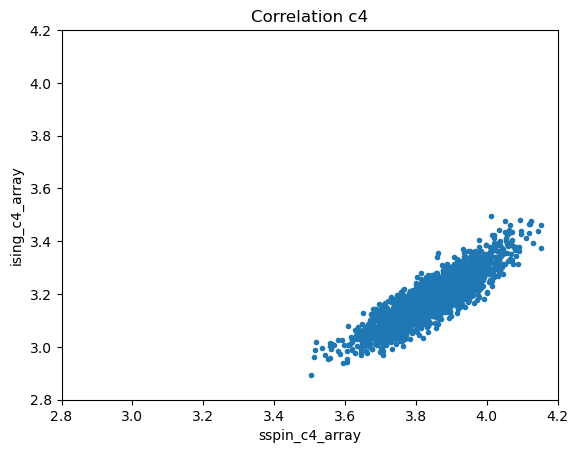

<Figure size 640x480 with 0 Axes>

In [98]:
print(sspin_cv.index(max(sspin_cv)))
New_sspin_aC=[item/10000 for item in sspin_aC[sspin_cv.index(max(sspin_cv))]]

plt.plot(New_sspin_aC,Correlaiton_list_10,'.')
plt.ylim(0.4, 1)
plt.xlim(0.4, 1)
plt.xlabel('sspin')
plt.ylabel('ising')
plt.title('Correlation c2')
plt.figure()

plt.plot(sspin_c3_array,ising_c3_array,'.')
plt.ylim(1.4, 2.5)
plt.xlim(1.4, 2.5)
plt.xlabel('sspin_c3_array')
plt.ylabel('ising_c3_array')
plt.title('Correlation c3')
plt.figure()

plt.plot(sspin_c4_array,ising_c4_array,'.')
plt.ylim(2.8, 4.2)
plt.xlim(2.8, 4.2)
plt.xlabel('sspin_c4_array')
plt.ylabel('ising_c4_array')
plt.title('Correlation c4')
plt.figure()

In [57]:
print(draw3_list.index(draw3_list[10]))
print(chosen_indice_10.index(draw3_list[0][0]))

10
33


In [ ]:
# three correlation

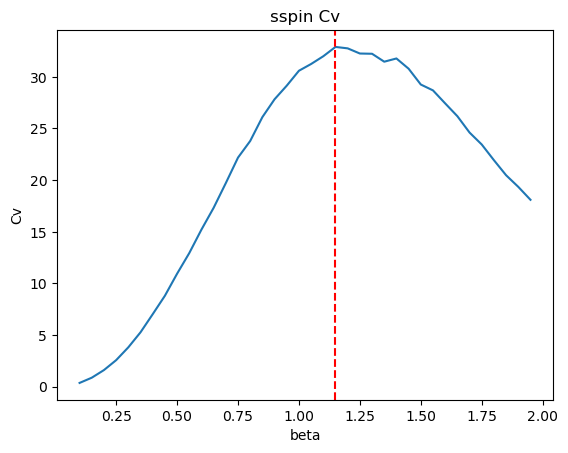

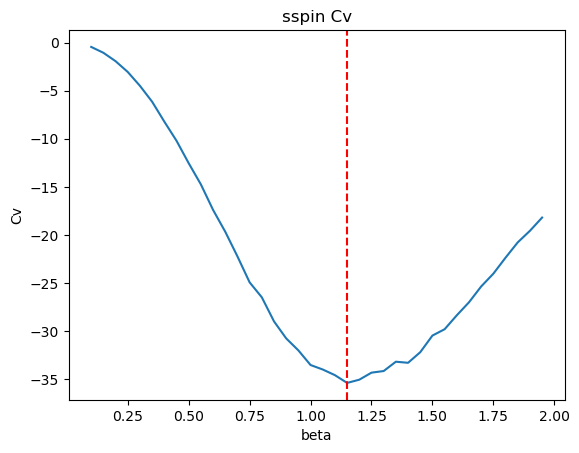

In [ ]:
plt.plot(betas,sspin_cv)
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
plt.axvline(betas[sspin_cv.index(max(sspin_cv))],color = 'r',ls='--')
plt.figure()
plt.plot(betas,sspin_dMdT)
plt.xlabel('beta')
plt.ylabel('Cv')
plt.title('sspin Cv')
plt.axvline(betas[sspin_cv.index(max(sspin_cv))],color = 'r',ls='--')

In [ ]:
# find max beta for sspin
print(sspin_cv.index(max(sspin_cv)))
print(betas[sspin_cv.index(max(sspin_cv))])

21
1.1500000000000004
